# Lesson 7 - Parkinson PCR

## Author - Dustin Burnham

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [1]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [3]:
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [5]:
# Define the target and features:
target_label = 'total_UPDRS'
non_features = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets
parkinsons_df = parkinsons_df.drop(non_features, axis=1)

# One-hot encode inputs
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))

# Get target and original x-matrix
y = parkinsons_df[target_label]
X = parkinsons_df.as_matrix(columns=feature_labels)

DataFrame one-hot-expanded shape: (5875, 17)


/Users/dusty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [6]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [7]:
# Scale all columns first

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function
#    to each column).
x_scaled = np.apply_along_axis(scale, 0, X)

# Create a scaled y-target.
y_scaled = scale(y)

In [8]:
# PCR!!
pca = PCA()
pca_result = pca.fit_transform(X)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

In [9]:
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,total_UPDRS
0,0.032262,-0.063082,-0.160399,-0.075797,-0.036048,-0.020489,0.003958,-0.004517,0.008281,-0.000183,0.000860,-0.000365,-0.000109,-0.000002,0.000003,-1.894103e-06,0.502745
1,-5.506490,0.119718,-0.027369,-0.048629,-0.009077,0.002927,0.000151,0.002084,0.001933,-0.000662,0.000745,0.000243,-0.000119,-0.000005,-0.000003,1.919426e-06,0.549103
2,-1.373763,-0.055115,-0.073258,-0.064052,-0.083374,-0.015379,-0.006209,-0.003317,0.000595,-0.000291,0.000013,0.000084,-0.000318,0.000005,0.000003,-1.825812e-06,0.595367
3,-2.760920,0.144331,0.047901,0.032369,-0.145759,-0.042199,-0.014273,-0.013032,-0.007849,-0.001435,-0.003835,0.000429,0.000300,0.000015,-0.000002,-2.558265e-06,0.634716
4,-4.449132,0.068235,0.009236,-0.034520,-0.068758,-0.012732,-0.006856,0.001855,-0.001202,-0.000238,0.000084,0.000276,-0.000377,0.000002,-0.000004,-6.738290e-07,0.687522


Text(0, 0.5, 'Explained Variance')

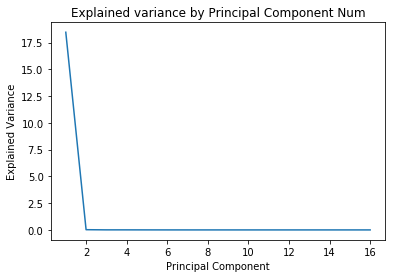

In [10]:
# Plot the explained variance for all principal components.
# Note: If the first value is too large, it may dwarf how the rest look.
# You may consider plotting starting with the 2nd value (python index at 1).
plt.plot([i for i in range(1,17)], pca.explained_variance_)
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     60.70
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.22e-38
Time:                        22:00:03   Log-Likelihood:                -8246.5
No. Observations:                5875   AIC:                         1.650e+04
Df Residuals:                    5871   BIC:                         1.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.38e-15      0.013  -3.41e-13      1.0

Text(0.5, 1.0, 'Residual Histogram')

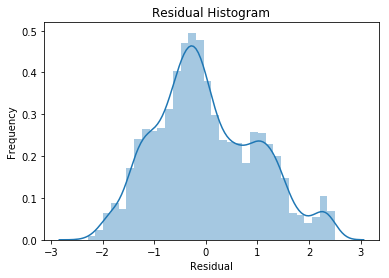

In [11]:
# Perform linear regression with the first N columns.
n = 3
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

Summary of your results!

### n-Components:
After running PCA on the data set and observing the explained variance in each component, I settled on 3.  The first component has a significantly larger explained variance than all of the others by orders of magnitude.  However, the next two are reasonably large once again compared to the rest, with values around 0.5.  As a result, I went with building the model with just the first 3 components.  I do have some concerns because of the distribution of residuals.  One assumption of building a linear model, is that the residuals will be normally distributed, and they obviously are not.  There must be other factors, or maybe an interaction term that would better describe the relationship.

### Adjusted R-Squared:
Going along with the last point mentioned above, the relationship doesn't appear linear.  We can see this in the adjusted R-squared value for my model is 0.03 which is very weak considering an adjusted R-squared of 0 shows no association.  I played around with the components, and checked out what the adjusted R-squared would be with the full amount of components, and it was around 0.1. I thought because this model included parameters that had close to no explained variance, that this model would not be generalizable for future datasets, so I stuck with the more simple model with 3 components.